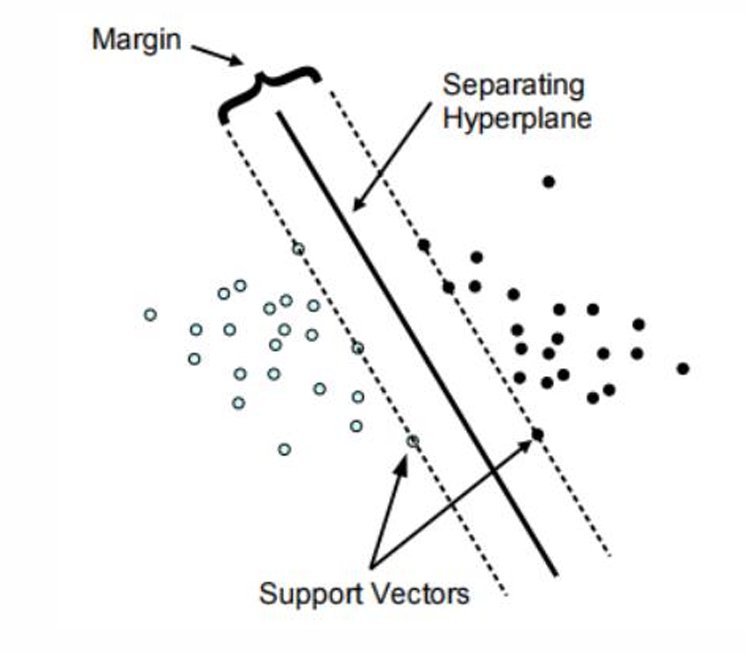

## 서포트 벡터 머신 (Support Vector Machine, SVM)

### 1. 개요
- **선형 모델의 성능을 개선한 분류 알고리즘**
- 데이터를 분류할 때, 단순히 나누는 것이 아니라  
  **클래스 간의 마진(Margin)** 을 **가장 넓게 유지하는 결정 경계(Decision Boundary)** 를 찾는 방식
- 목표: 두 클래스를 최대한 멀리 떨어뜨리는 경계면을 찾는 것

---

### 2. 주요 개념

#### • Support Vector
- 각 클래스의 데이터 포인트 중 **결정 경계(Support Hyperplane)** 와의 거리가 가장 짧은 벡터
- 이 벡터들이 실제로 **결정 경계 위치를 결정**한다.

#### • Margin
- Support Vector와 결정 경계 사이의 거리  
- 마진이 넓을수록 → 모델의 일반화(Generalization) 성능이 좋아짐  
- 학습 데이터의 일부 노이즈(Noise)를 무시할 수 있어 **과적합을 방지**

$$
\text{Margin} = \frac{2}{||w||}
$$

---

### 3. SVM의 특징

- 선형 분류 직선이 잘 작동하는 것처럼 보이지만,  
  실제로는 새로운 데이터에 대해 잘 일반화되지 않을 수 있음.
- **SVM은 두께가 있는 마진(margin)을 가진 결정 경계**를 만들어  
  더 안정적이고 일반화된 분류를 수행.
- 마진의 중앙선을 결정 경계로 설정함.

> **핵심 포인트**
> - 마진이 클수록 안정적인 분류  
> - 과적합(overfitting) 방지 효과

---

### 4. 데이터 스케일링 주의
- SVM은 **선형 결합**과 **거리 계산**을 기반으로 하므로,  
  변수의 단위가 다르면 모델이 왜곡될 수 있음.
- 따라서 **데이터 표준화(Scaling)** 가 필수  
  ```python
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)


## 커널 방식 (Kernel Trick)

### 1. 개요
- **SVM에서 비선형 분류 문제를 해결하기 위한 핵심 개념**  
- 선형 분리가 불가능한 데이터를 **고차원 특성 공간(feature space)** 으로 변환하여  
  **선형 분리(linear separation)** 가 가능하도록 만드는 방법  
- 이때 변환 과정을 **명시적으로 계산하지 않고도** 내적(inner product) 형태로 계산할 수 있게 해주는 것이 **커널 트릭(Kernel Trick)** 이다.

---

### 2. 커널 트릭의 개념

#### (1) 저차원 공간
- 데이터가 직선으로 구분되지 않음  
- 예시: 1차원 데이터에서 두 클래스가 서로 섞여 있어 직선 분리가 불가능  

#### (2) 고차원 공간으로 변환
- 입력 데이터를 **고차원 특성 공간**으로 사상(mapping)  
- 고차원에서는 **직선(또는 평면)** 으로 분리 가능  
- 이 변환을 수행하는 함수:  
  $$
  \phi(x) : \mathbb{R}^n \rightarrow \mathbb{R}^m \quad (m > n)
  $$

#### (3) 커널 함수
- 실제로 $\phi(x)$ 를 계산하지 않고,  
  두 벡터의 내적 $\phi(x_i) \cdot \phi(x_j)$ 을 직접 구할 수 있게 하는 함수  
  $$
  K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
  $$

---

### 3. 커널 방식의 작동 원리

1. **입력 데이터 집합**  
   - 저차원의 특성을 가진 입력 샘플 공간

2. **변형 데이터 집합**  
   - 커널 트릭을 통해 입력 데이터를 고차원 특성 공간으로 변환  
   - 변환된 공간에서는 **직선으로 분류 가능**

3. **결과**  
   - 원래는 비선형적으로 섞여 있던 데이터를,  
     고차원 공간에서 선형 분류기로 나눌 수 있게 됨

---

### 4. 주요 커널의 종류

| 커널 종류 | 설명 | 수식 |
|:--|:--|:--|
| **Linear Kernel** | 선형 분류용 기본 커널 | $K(x, x') = x \cdot x'$ |
| **Polynomial Kernel** | 다항식 기반의 비선형 커널 | $K(x, x') = (x \cdot x' + c)^d$ |
| **RBF Kernel (Radial Basis Function)** | 가장 널리 사용되는 커널. 비선형 분류에 강함 | $K(x, x') = e^{-\gamma ||x - x'||^2}$ |

- RBF 커널은 **sklearn의 기본 커널**이며, 대부분의 비선형 분류 문제에서 높은 성능을 보임.

---

### 5. 커널 방식의 시각적 예시

#### • 주어진 데이터 집합
- 저차원(예: 1D)에서 직선으로 구분이 불가능한 데이터

#### • 변형 데이터 집합
- 커널 트릭을 통해 2D 혹은 3D 고차원으로 매핑  
- 고차원 공간에서는 직선(또는 평면)으로 분류 가능

#### • 예시 그림 설명
- 파란색 선 → 1차원 데이터  
- 붉은색 곡선 → 고차원으로 사상된 데이터  
- 고차원에서 직선 분류가 가능해짐

---

### 6. 정리 요약

| 구분 | 설명 |
|:--|:--|
| **목적** | 비선형 데이터를 선형적으로 분류 가능하게 함 |
| **핵심 아이디어** | 데이터를 고차원 공간으로 변환 (커널 트릭) |
| **장점** | 명시적 계산 없이 효율적으로 비선형 분류 수행 |
| **대표 커널** | Linear, Polynomial, RBF |
| **기본 커널** | RBF (Scikit-learn의 기본값) |

---


# **SVM 실습**

### **iris 데이터**

In [1]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

### **그래프 그리기**
전체 4개의 특성 중, 앞의 2개의 특성만 이용

In [2]:
X2 = X[:, :2]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']

for i in range(3):
    xs = X2[:, 0][y == i]
    ys = X2[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
    
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Text(0, 0.5, 'Sepal width')

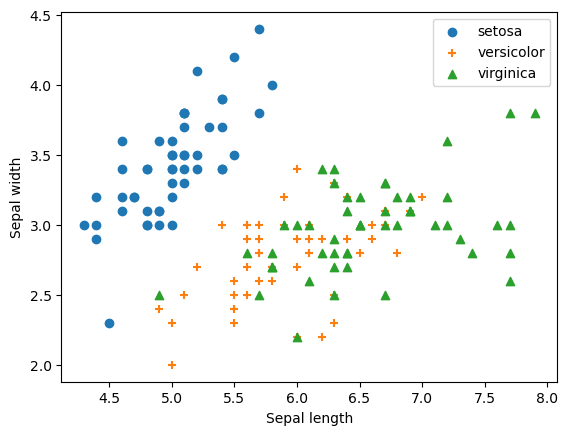

In [4]:
plt.show()

# **이진 분류 문제로 변환**
- setosa와 setosa가 아닌 것으로 구분

- 즉, 레이블이 0, 1, 2가 아니라 0, 1 두 개만으로 변환

In [5]:
y2 = y.copy()   
y2[(y2==2)] = 1 # y중에 2의 값을 모두 1로 바꾼다

y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.7)

In [7]:
markers = ['o', '+', '^']

for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
    
binary_names = ['setosa', 'non-setosa']

plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Text(0, 0.5, 'Sepal width')

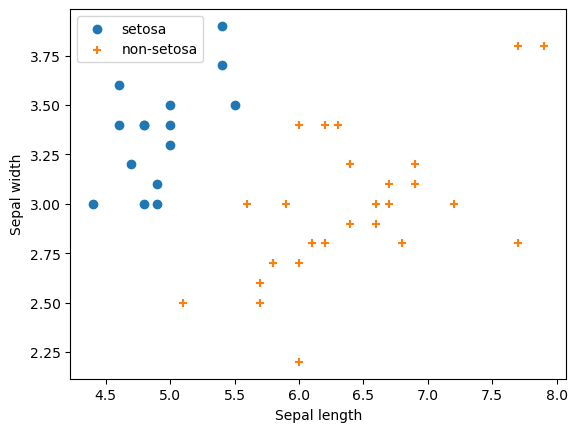

In [8]:
plt.show()

In [9]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)

SGDClassifier()

In [10]:
a = clf.coef_[0,0]
b = clf.coef_[0,1]
c = clf.intercept_

In [11]:
a, b, c

(np.float64(75.63587684069591),
 np.float64(-121.82061579651912),
 array([-36.50451497]))

In [12]:
clf.score(X_test, y_test)

0.9904761904761905

## SVM
- 마진을 최대화 (maximizing the margin)
- 즉, 결정경계 주변에 있는 샘플들과 결정경계와의 거리(margin)를 최대화하는 방향으로 결정 경계 설정
- 그래야 일반화 성능이 좋아진다

- kernel : linear, poly, rbf, sigmoid, precomputed or a callable
- C : Error 항의 penalty parameter
    - 손실 함수 = C * (에러항) + 규제항
    - 즉, C값이 커지면 --> 분류 정확도(훈련 데이터) high, 대신 margin 줄어든다
    - 따라서 Noise 많은 데이터의 경우, C 값을 낮춰서 마진을 늘려지도록 하는 것이 좋다
- gamma : rbf 커널에서 하나의 훈련 샘플이 얼마나 멀리 영향이 미치게 할 것인가 결정
    - gamma 가 커지면, 가깝게 영향
    - 참고 : http://hleecaster.com/ml-svm-concept/

## **결정 경계**
- ax1 + bx2 + c >= 0
- x2 >= - a/b x1 - c/b
- SVC : a -> w[0], b -> w[1], c -> v

### **Support vector 생성**
각 class별(column)로 결정 경계에 가장 가까운 데이터 집합

In [13]:
from sklearn.svm import SVC

In [14]:
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_train, y_train)

plt.figure(figsize=(8,6)) 
plt.xlim(3.9,7.1) 
plt.ylim(1.9,4.5)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]
XX = np.linspace(4, 8, 30)

decision_boundary = -w[0]/w[1] * XX - v/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin 
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAFFAA') 

plt.plot(XX, decision_boundary, "k-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")

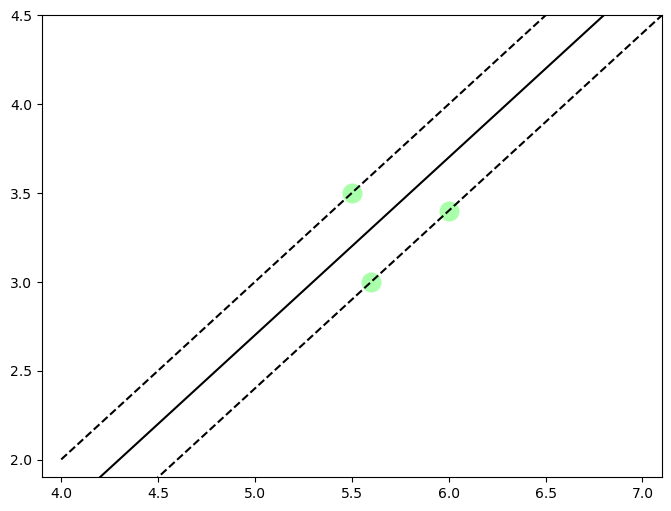

In [15]:
plt.show()

In [16]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_train, y_train)

plt.figure(figsize=(8,6)) 
plt.xlim(3.9,7.1) 
plt.ylim(1.9,4.5)
w = svm_clf.coef_[0]
v = svm_clf.intercept_[0]
XX = np.linspace(4, 8, 30)

decision_boundary = -w[0]/w[1] * XX - v/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin 
gutter_down = decision_boundary - margin
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAFFAA') 


plt.plot(XX, decision_boundary, "k-")
plt.plot(XX, gutter_up, "k--")
plt.plot(XX, gutter_down, "k--")

markers = ['o', '+', '^'] 
for i in range(3):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i] 
    plt.scatter(xs, ys, marker=markers[i])
    
binary_names = ['setosa', 'non-setosa'] 
plt.legend(binary_names)
plt.xlabel("Sepal length") 
plt.ylabel("Sepal width")

# 선형분류 결정 경계선
plt.plot(XX, (-a/b * XX + -c/b), "r-")

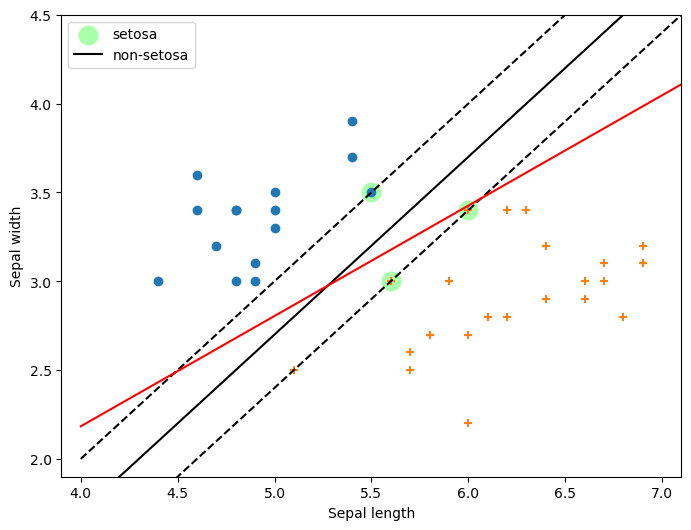

In [17]:
plt.show()

### SVM은 선형 모델보다 일반화된 모델을 만들고 과대적합을 피하게 된다

In [18]:
svm_clf.score(X_test, y_test)

1.0

In [19]:
svs

array([[5.5, 3.5],
       [6. , 3.4],
       [5.6, 3. ]])

# **커널 기법**
유방암 예제

In [20]:
from sklearn.datasets import load_breast_cancer

In [21]:
cancer = load_breast_cancer() 
X = cancer.data
y = cancer.target

X.shape, y.shape

((569, 30), (569,))

- Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
- probability : Whether to enable probability estimates

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(13)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=cancer.target)

In [23]:
# from sklearn.multiclass import OneVsRestClassifier

# classifier = OneVsRestClassifier(SVC(kernel='rbf', C=1000, gamma=0.1,probability=True))
# classifier = classifier.fit(X_train, y_train)
# classifier.score(X_test, y_test)

classifier = SVC(kernel='rbf', C=1000, gamma=0.1, probability=True)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.6293706293706294

In [24]:
classifier = SVC(kernel='rbf', C=0.1, gamma=0.1, probability=True)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.6293706293706294

## **선형 분류의 경우**

In [25]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(max_iter=1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8951048951048951

In [26]:
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_train, y_train)

print("SVM score:", svm_clf.score(X_test, y_test))

SVM score: 0.9440559440559441


## **분류 성능 평가**
정적 성능 평가